## PCA Analysis in Python's using sklearn

This notebook serves to discuss what is actually occuring behind the scenes in sklearn when the decomposition.pca package is being used.



unitary eigenvectors:  complex square matrix U is unitary if its conjugate transpose U∗ is also its inverse—that is, if U'U = UU'=I

https://en.wikipedia.org/wiki/Unitary_matrix

##### Two excellent references:
1. [Machine Learning: A Probabalistic Method](https://mitpress.mit.edu/books/machine-learning-0), *by Kevin P. Murphy* (he was a senior Research Scientist at Google in early days)
2. [The Elements of Statistical Learning: Data Mining, Inference and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/), *by Hastie et. al.* (authors are from CS and Stats departments at Stanford)

In [26]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import decimal
import pandas as pd

## Generate Signals

In [74]:
base_signalA = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
base_signalB = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])
base_signalC = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [75]:
#plt.plot(range(0, 10), (base_signalA + base_signalB + base_signalC) /3.0, 'b--');

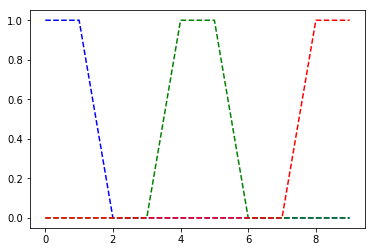

In [76]:
plt.plot(range(0, 10), base_signalA, 'b--');
plt.plot(range(0, 10), base_signalB, 'g--');
plt.plot(range(0, 10), base_signalC, 'r--');

In [77]:
# Every signal is based on other signals

allSignals = []
counter = 0

for number in range(0,1000):
    firstSignal = np.array(np.nan * np.zeros(10))
    for x in range(0,len(base_signalA)):
        firstSignal[x] = (np.random.uniform(.99,1) * base_signalA[x]) + np.random.uniform(0,.01)
    allSignals.append(firstSignal)
        
for number in range(0,1000):
    secondSignal = np.array(np.nan * np.zeros(10))
    for x in range(0,len(base_signalB)):
        secondSignal[x] = (np.random.uniform(.99,1) * base_signalB[x]) + np.random.uniform(0,.01)
    allSignals.append(secondSignal)
    
for number in range(0,1000):  
    thirdSignal = np.array(np.nan * np.zeros(10))
    for x in range(0,len(base_signalC)):
        thirdSignal[x] = (np.random.uniform(.99,1) * base_signalC[x]) + np.random.uniform(0,.01)
    allSignals.append(thirdSignal)

In [78]:
allSignals = pd.DataFrame(allSignals)

In [79]:
allSignals.head()

,0,1,2,3,4,5,6,7,8,9
0,0.999633,0.996879,0.001890,0.003040,0.000594,0.000306,0.001648,0.004717,0.004202,0.005064
1,1.005212,1.000013,0.006776,0.004553,0.005299,0.000441,0.006752,0.001622,0.006706,0.006507
2,1.003700,1.005501,0.001348,0.000865,0.004672,0.008888,0.005150,0.008301,0.002988,0.006352
3,0.995212,1.002144,0.001229,0.002564,0.004303,0.000191,0.001723,0.005112,0.004153,0.003944
4,1.001160,1.003664,0.003120,0.000875,0.007157,0.007329,0.008568,0.007089,0.008629,0.008507


## Covariance

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a $n \times n$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$sigma = \frac{1}{K}\sum_{k=1}^{K}\frac{\left(x^{(k)}-\bar{x}\right)}{\sigma}\frac{\left(  x^{(k)}-\bar{x}\right)^{T}}{\sigma}$

This is standardizing the data

pg. 567 of (pattern recognition and machine learning by Bishop

Some people use K-1 instead of K for [bessels correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)

where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \frac{1}{K}\sum\limits_{k=1}^K x^{(k)}.$  
The mean vector is a $n$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

where $\sigma = \sqrt{\frac{1}{K}\sum\limits_{k=1}^K \left(x^{(k)}-\bar{x}\right)^{2}}$

In [80]:
zeroMean = (allSignals.values - np.mean(allSignals.values, axis = 0)) / np.std(allSignals.values, axis = 0)

In [81]:
zeroMean = pd.DataFrame(zeroMean)

In [82]:
cov_mat = (zeroMean).T.dot((zeroMean)) / (zeroMean.shape[0])

In [83]:
cov_mat

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.999949,0.020503,-0.005259,-0.499842,-0.499705,0.021266,-0.033131,-0.500137,-0.500114
1,0.999949,1.000000,0.020491,-0.005321,-0.499781,-0.499643,0.021383,-0.032668,-0.500199,-0.500177
2,0.020503,0.020491,1.000000,-0.003529,-0.006914,-0.007091,0.003828,0.028565,-0.013577,-0.013762
3,-0.005259,-0.005321,-0.003529,1.000000,0.020814,0.021028,0.014538,-0.007491,-0.015633,-0.015366
4,-0.499842,-0.499781,-0.006914,0.020814,1.000000,0.999949,-0.002468,0.023519,-0.499947,-0.499967
5,-0.499705,-0.499643,-0.007091,0.021028,0.999949,1.000000,-0.002112,0.023456,-0.500082,-0.500105
6,0.021266,0.021383,0.003828,0.014538,-0.002468,-0.002112,1.000000,-0.028703,-0.019078,-0.019046
7,-0.033131,-0.032668,0.028565,-0.007491,0.023519,0.023456,-0.028703,1.000000,0.009463,0.009645
8,-0.500137,-0.500199,-0.013577,-0.015633,-0.499947,-0.500082,-0.019078,0.009463,1.000000,0.999950
9,-0.500114,-0.500177,-0.013762,-0.015366,-0.499967,-0.500105,-0.019046,0.009645,0.999950,1.000000


## Singular Value Decomposition

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html

u = Unitary matrices <br>
s = singular values for every matrix, sorted in descending order <br>
v = unitary matrices (ie U*U = UU* = I)

In [84]:
# N^3 maybe to solve. check...

u, s, v = np.linalg.svd(cov_mat, full_matrices=True)

In [85]:
print(u.shape)
print(np.diag(s).shape)
print(v.shape)

(10, 10)
(10, 10)
(10, 10)


In [155]:
# Principal Component 1, is the first eigenvector. 
v[0]

array([-0.56747927, -0.56748362, -0.01773005,  0.00104016,  0.19359666,
        0.1935088 , -0.02005341,  0.02678049,  0.37388237,  0.37387364])

In [156]:
#plt.plot(range(0, 10), -(u[0] * s[0]) + np.mean(allSignals.values, axis = 0))

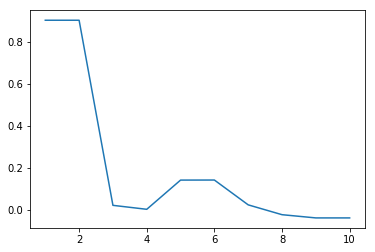

In [157]:
# Principal Component 1
plt.plot(range(1, 11), np.mean(allSignals.values, axis = 0) - v[0])

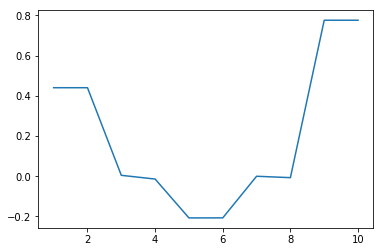

In [158]:
# Principal Component 2
plt.plot(range(1, 11), np.mean(allSignals.values, axis = 0) - v[1])

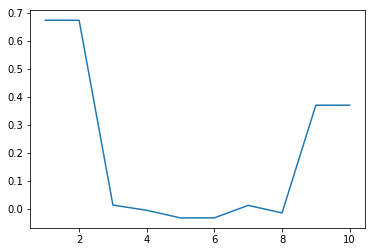

In [159]:
# First 2 Principal Components
plt.plot(range(1, 11), ((np.mean(allSignals.values, axis = 0) - v[0]) + np.mean(allSignals.values, axis = 0) - v[1])/2.0  )

In [181]:
# Cumulative explained variance
# remember s is eigenvalues
tot = sum(s)
cumulative_explained_variance = np.cumsum(s)

In [182]:
cumulative_explained_variance = (np.cumsum(s)/ tot) * 100

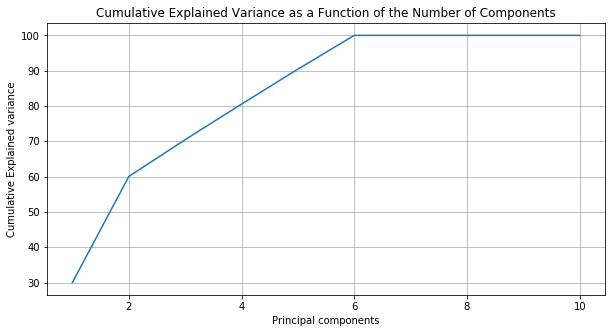

In [188]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), cumulative_explained_variance, label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
#plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
#plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
#plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.grid()
plt.show()

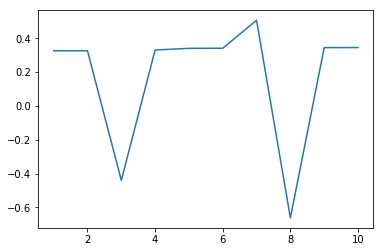

In [138]:
# Look at Principal Component 3
plt.plot(range(1, 11), np.mean(allSignals.values, axis = 0) - v[2])

## Reconstruct Original Signal

In [ ]:
np.mean(allSignals.values, axis = 0) +  pd.DataFrame(data = (u * s)) 

## Use PCA

In [121]:
zeroMean = allSignals.values - np.mean(allSignals.values, axis = 0)
#zeroMean = (allSignals.values - np.mean(allSignals.values, axis = 0)) / np.std(allSignals.values, axis = 0)

In [122]:
zeroMean = pd.DataFrame(zeroMean)
originalNow = pd.DataFrame(allSignals.values)

In [123]:
zeroMean.mean()

0   -3.773833e-16
1    2.361629e-16
2   -2.672920e-19
3    3.356690e-19
4   -9.279614e-17
5   -6.422640e-17
6    3.027092e-19
7    3.877107e-19
8   -2.353673e-16
9   -2.007283e-16
dtype: float64

In [124]:
# Make an instance of the Model
pca = PCA(svd_solver = 'full')

zeroMean_eig = pca.fit_transform(zeroMean)

In [125]:
len(pca.components_)

10

In [126]:
#np.mean(df.values, axis = 0) + (u * s)

In [127]:
np.mean(allSignals.values, axis = 0)

array([ 0.33667042,  0.33666095,  0.00500582,  0.00491774,  0.3365535 ,
        0.33676409,  0.00497822,  0.0050054 ,  0.33674824,  0.33673292])

In [128]:
np.mean(allSignals.values, axis = 0)

array([ 0.33667042,  0.33666095,  0.00500582,  0.00491774,  0.3365535 ,
        0.33676409,  0.00497822,  0.0050054 ,  0.33674824,  0.33673292])

In [129]:
pca.components_[0].shape

(10,)

In [130]:
-pca.components_[0]

array([  1.10047045e-01,   1.10121241e-01,   2.74863643e-05,
         6.82831430e-05,   4.35832870e-01,   4.35916582e-01,
         4.93240774e-05,   5.71704808e-06,  -5.45842009e-01,
        -5.45752597e-01])

In [131]:
-pca.components_[0] + np.mean(allSignals.values, axis = 0)

array([ 0.44671747,  0.44678219,  0.00503331,  0.00498602,  0.77238637,
        0.77268067,  0.00502754,  0.00501112, -0.20909377, -0.20901968])

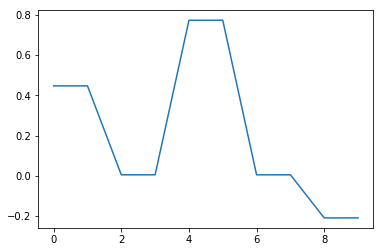

In [132]:
# 1st Principal Component
plt.plot(range(0, 10), -pca.components_[0] + np.mean(allSignals.values, axis = 0))

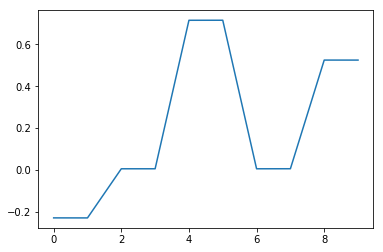

In [133]:
# 1st Principal Component
plt.plot(range(0, 10), -pca.components_[1] + np.mean(allSignals.values, axis = 0))

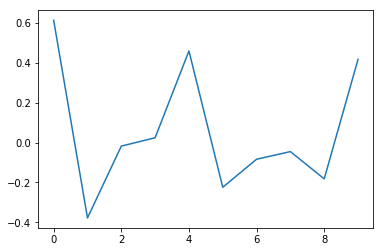

In [134]:
# 3rd, Principal Component
# Garbage
plt.plot(range(0, 10), pca.components_[2])

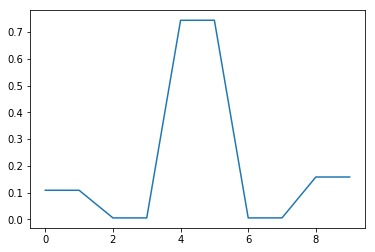

In [135]:
# First Two PCA. 
plt.plot(range(0, 10),   np.mean(allSignals.values, axis = 0) - (pca.components_[0] + pca.components_[1]) /2)

## Explained Variance

In [407]:
tot = sum(pca.explained_variance_)

In [408]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

In [409]:
var_exp

[50.005288650721461,
 49.988785689398554,
 0.00088030964365937517,
 0.00086460573189138111,
 0.00085123312730677348,
 0.00082158963188483066,
 0.00064317776160355646,
 0.00063943081326163791,
 0.00061692024431044793,
 0.00060839292607892852]

In [410]:
plt.plot(range(1,11), var_exp)
plt.

SyntaxError: invalid syntax (<ipython-input-410-9f87d41cd3b2>, line 2)

In [142]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

In [144]:
cum_var_exp

array([  49.77087541,   99.32346362,   99.43447399,   99.53860057,
         99.63798586,   99.73303035,   99.80750921,   99.87946081,
         99.94433094,  100.        ])

In [216]:
"""

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(0, 0), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
#plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
#plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

"""

"\n\n# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED \nplt.figure(figsize=(10, 5))\nplt.step(range(0, 0), cum_var_exp, where='mid',label='cumulative explained variance')\nplt.title('Cumulative Explained Variance as a Function of the Number of Components')\nplt.ylabel('Cumulative Explained variance')\nplt.xlabel('Principal components')\n#plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')\n#plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')\nplt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')\nplt.legend(loc='best')\nplt.show()\n\n"

In [136]:
pca.cexplained_variance_ratio_

array([ 0.49770875,  0.49552588,  0.0011101 ,  0.00104127,  0.00099385,
        0.00095044,  0.00074479,  0.00071952,  0.0006487 ,  0.00055669])

In [292]:
# example data from sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [293]:
np.random.uniform(0,.1)

0.038008155791571234

##### Create the PCA fit using sklearn function

We will see what is going on behind the scenes below.  For the purposes of this example, we keep all components so that we can fully reconstruct the original parameter matrix, $X$

In [3]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### Transform the data into new space using sklearn built in function

Formally, we are projected the original parameters onto the new space defined by directions of maximum variance (where the directions are orthogonal to eachother)

In [5]:
# representation of X in transformed space, ie, projection of X onto new basis
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

##### The new space is represented by a basis, which happen to be the eigenvectors

these are the eigenvectors (directions) for the transformed data in the reduced space

In [16]:
pca.components_ 

array([[-0.83849224, -0.54491354],
       [ 0.54491354, -0.83849224]])

##### In solving the PCA problem, the eigenvectors are constructed to be orthonormal

that is, $ \vec{e}_i \cdot  \vec{e}_j = 0$ when $j \ne i$ and $ \vec{e}_i \cdot  \vec{e}_j = 1$ when $j = i$

In [15]:
print(np.dot(pca.components_[:,0],pca.components_[:,1]))
print(np.dot(pca.components_[:,0],pca.components_[:,0]))

0.0
1.0


##### Singular values

We will say more about these below

In [14]:
pca.singular_values_

array([ 6.30061232,  0.54980396])

##### Transform from new space back to the original parameter space

projection of new basis representation of $X$ back to original basis representation of $X$, which recovers original data (when all components used)

In [9]:
pca.inverse_transform(Z)

array([[-1., -1.],
       [-2., -1.],
       [-3., -2.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.]])

#### Above, we have shown the full deconstruction and reconstruction of X when using all components.

We will now walk through two separate calculations using some linear algebra (which is what sklearn functions are actually doing)

##### We will compute the Covariance matrix $C$ and corresponding eigenvectors and eigenvalues

In [10]:
C = 1/(X.shape[0])*np.dot(X.T,X)
w, v = np.linalg.eig(C) 

##### The components output from sklearn is simply the eigenvalues of the covariance matrix

In [11]:
v

array([[ 0.83849224, -0.54491354],
       [ 0.54491354,  0.83849224]])

##### The eigenvalues do not show up explicitly in the sklearn object, but are nothing more than the (scaled) square of the singular values

In [13]:
np.sqrt(w*(X.shape[0]))

array([ 6.30061232,  0.54980396])

##### you can calculate your eigenvectors with the PCA outputs

$ Z = XV$ where $V'$ = pca.components_ array

In [17]:
Z1 = np.dot(X,pca.components_.T)
Z1

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [ ]:
# SVD can be recovered: X = U*sig*V'
sig_inv = np.linalg.inv(np.eye(2)*pca.singular_values_)

U = np.dot(Z1,sig_inv) 
U

In [ ]:
# check U orthonormal
print(np.dot(U[:,0],U[:,1]))
np.linalg.norm(np.dot(U[:,0],U[:,1])) < 10**-10

##### map back to original space

In [ ]:
Xhat = np.dot(Z1,pca.components_)
Xhat

<h3>Now use Singular Value Decomposition (SVD) to do same thing without using sklearn wrapper</h3>

$ X = U\Sigma V'$ is the common SVD representation, where $U$ and $V$ are unitary, and $\Sigma$ is diagonal.  Then, we have,

$Z := XV = U\Sigma $ and clearly, to recover $X$, we have $X = ZV' = XVV'$

In [56]:
u, s, vh = np.linalg.svd(X, full_matrices=True)

In [57]:
print(u.shape)
print(np.diag(s).shape)
print(vh.shape)

(6, 6)
(2, 2)
(2, 2)


In [58]:
u

array([[-0.21956688,  0.53396977, -0.48030985,  0.45219595,  0.02811389,
         0.48030985],
       [-0.35264795, -0.45713538, -0.30371038, -0.31508521,  0.61879559,
         0.30371038],
       [-0.57221483,  0.07683439,  0.75680405,  0.17257785,  0.0706181 ,
         0.24319595],
       [ 0.21956688, -0.53396977,  0.03329824,  0.79735166,  0.1693501 ,
        -0.03329824],
       [ 0.35264795,  0.45713538,  0.20989771,  0.03007049,  0.7600318 ,
        -0.20989771],
       [ 0.57221483, -0.07683439,  0.24319595, -0.17257785, -0.0706181 ,
         0.75680405]])

In [59]:
s

array([ 6.30061232,  0.54980396])

In [60]:
# full representation of singular values
S = np.zeros((6, 2))
S[:2, :2] = np.diag(s)
S

array([[ 6.30061232,  0.        ],
       [ 0.        ,  0.54980396],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [61]:
vh

array([[ 0.83849224,  0.54491354],
       [ 0.54491354, -0.83849224]])

##### Create basis for transformed space, ie, create $Z$.  Note that this will equal sklearn up to order, to get perfect match, we would order these based on largest singular value

In [65]:
Z2 = np.dot(X,vh.T)
Z2

array([[-1.38340578,  0.2935787 ],
       [-2.22189802, -0.25133484],
       [-3.6053038 ,  0.04224385],
       [ 1.38340578, -0.2935787 ],
       [ 2.22189802,  0.25133484],
       [ 3.6053038 , -0.04224385]])

##### Map back to original paramter space, ie, recover X

In [68]:
Xhat1 = np.dot(Z2,vh)
Xhat1

array([[-1., -1.],
       [-2., -1.],
       [-3., -2.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.]])

## Concluding Remarks

In using PCA Analysis, to reduce dimension, we simply start removing eigenvectors that correspond to 'small' eigenvalues, then proceed with the same calculation.  

Or, in terms of [SVD](https://en.wikipedia.org/wiki/Singular-value_decomposition), remove singular values that are 'small' and their corresponding singular vectors.  

In either case, you proceed with the calculations above with the reduced matrices / vectors.

#### That's it, now you're an expert in the PCA done by sklearn

## Tutorial

### Get Data

In [8]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [9]:
df = df.iloc[:, 0:-1]

In [10]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Covariance

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a $n \times n$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$sigma = \frac{1}{K}\sum_{k=1}^{K}\frac{\left(x^{(k)}-\bar{x}\right)}{\sigma}\frac{\left(  x^{(k)}-\bar{x}\right)^{T}}{\sigma}$

This is standardizing the data

pg. 567 of (pattern recognition and machine learning by Bishop

Some people use K-1 instead of K for [bessels correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)

where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \frac{1}{K}\sum\limits_{k=1}^K x^{(k)}.$  
The mean vector is a $n$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

where $\sigma = \sqrt{\frac{1}{K}\sum\limits_{k=1}^K \left(x^{(k)}-\bar{x}\right)^{2}}$

In [17]:
zeroMean = (df.values - np.mean(df.values, axis = 0)) / np.std(df.values, axis = 0)
#zeroMean = (df.values - np.mean(df.values, axis = 0))

In [18]:
zeroMean = pd.DataFrame(zeroMean)

In [19]:
cov_mat = (zeroMean).T.dot((zeroMean)) / (zeroMean.shape[0])

In [20]:
cov_mat

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


## Singular Value Decomposition

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.svd.html

u = Unitary matrices <br>
s = singular values for every matrix, sorted in descending order <br>
v = unitary matrices (ie U*U = UU* = I)

In [39]:
# N^3 maybe to solve. check...

u, s, v = np.linalg.svd(cov_mat, full_matrices=True)

In [40]:
print(u.shape)
print(np.diag(s).shape)
print(v.shape)

(10, 10)
(10, 10)
(10, 10)


In [23]:
s

array([ 2.91081808,  0.92122093,  0.14735328,  0.02060771])

In [24]:
v

array([[-0.52237162,  0.26335492, -0.58125401, -0.56561105],
       [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
       [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]])

In [452]:
 np.mean(df.values, axis = 0) + (u * s)

array([[ 4.32280457,  2.71101253,  3.86491086,  1.2040658 ],
       [ 6.60991158,  2.20135799,  3.72300233,  1.19610853],
       [ 4.15140866,  3.03456705,  3.73790573,  1.18215671],
       [ 4.19694246,  2.99373762,  3.66527395,  1.20945575]])

In [453]:
np.mean(df.values, axis = 0)

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [454]:
np.mean(df.values, axis = 0)

array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667])

In [215]:
s

array([ 2.91081808,  0.92122093,  0.14735328,  0.02060771])